In [56]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("soham.csv", sep=',')
data.columns = ['index', 'user_index', 'body_text', '#_comments', '#_subs', 'membership_duration','#_uploads','profanity_in_name','age', 'label']

del data['index']
del data['user_index']
del data['membership_duration']


def clean_text(text): 
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
    
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))


data['body_text'] = data['body_text'].apply(lambda x: clean_text(x))


In [57]:
data

,body_text,#_comments,#_subs,#_uploads,profanity_in_name,age,label,body_len,punct%
0,"[nebodyels, hear, crazi, ass, screamin, hoe, e...",10,1,3,0,15,0,395,8.1
1,"[mani, thing, incorrect, comment, unbeliev, gu...",3,0,5,0,31,0,506,4.2
2,"[326, hahah, boyfriend, show, song, love, tooo...",7,0,5,0,43,1,145,3.4
3,"[dick, beyonc, fuck, ass, hole, trueli, dog, b...",34,0,5,0,44,1,670,1.9
4,"[donghaetaemin, kai, luhansehun, bacon, xd, ta...",11,173,5,0,21,0,439,4.6
...,...,...,...,...,...,...,...,...,...
3459,"[pretti, love, song, miss, old, kelli, ok, rih...",15,2,7,0,23,1,230,9.1
3460,"[statusonlin, im, zxkillergirlzx, im, zxkiller...",4,28,23,1,15,0,113,14.2
3461,"[jr, cute, exo, better, agre, like, yeah, yeah...",23,0,3,0,33,0,156,6.4
3462,"[, ]",5,0,5,0,38,0,2,100.0


In [19]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

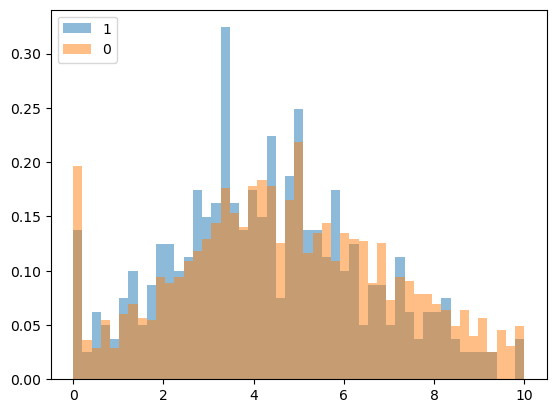

In [58]:
bins = np.linspace(0, 10, 50)
pyplot.hist(data[data['label']==1]['punct%'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['punct%'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 

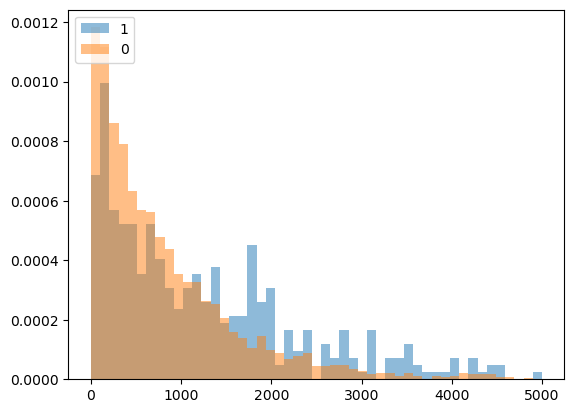

In [63]:
bins = np.linspace(0, 5000, 50)
pyplot.hist(data[data['label']==1]['body_len'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['body_len'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 

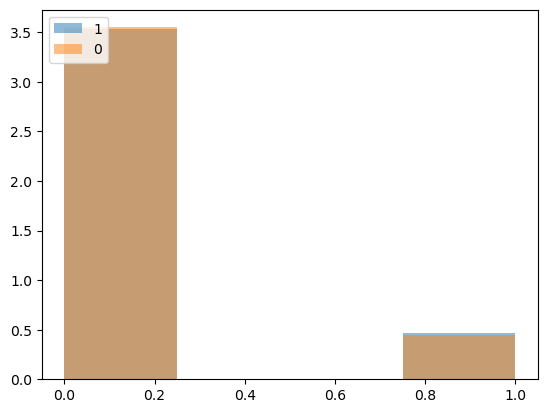

In [73]:
bins = np.linspace(0, 1, 5)
pyplot.hist(data[data['label']==1]['profanity_in_name'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['profanity_in_name'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 


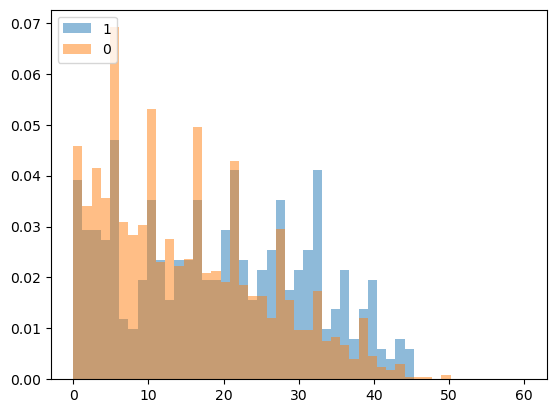

In [40]:
bins = np.linspace(0, 60, 50)
pyplot.hist(data[data['label']==1]['#_comments'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['#_comments'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 

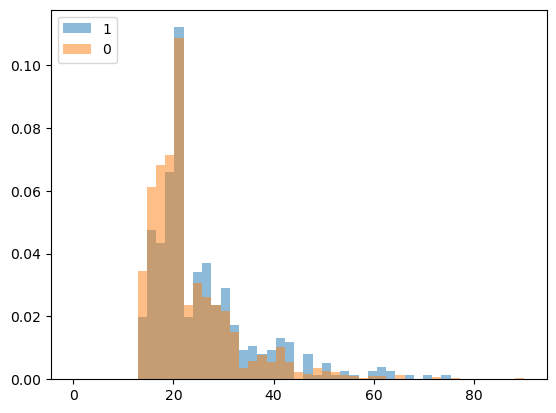

In [36]:
bins = np.linspace(0, 90, 50)
pyplot.hist(data[data['label']==1]['age'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['age'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 
                

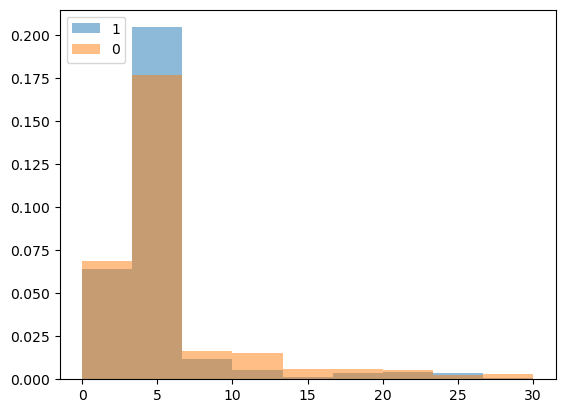

In [47]:
bins = np.linspace(0, 30, 10)
pyplot.hist(data[data['label']==1]['#_uploads'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['#_uploads'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 

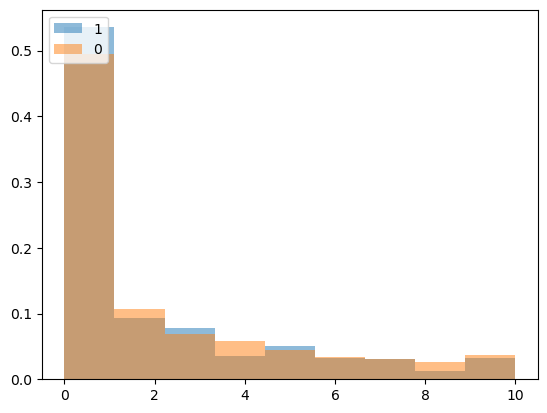

In [46]:
bins = np.linspace(0, 10, 10)
pyplot.hist(data[data['label']==1]['#_subs'], bins, alpha = 0.5, density=True, label=1)
pyplot.hist(data[data['label']==0]['#_subs'], bins, alpha = 0.5,density=True, label=0)
pyplot.legend(loc='upper left')

pyplot.show() 

In [68]:



from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['punct%'], data['body_len'], data['#_comments'], data['#_subs'], data['#_uploads'], data['profanity_in_name'], data['age'], pd.DataFrame(X_tfidf.toarray())], axis=1)

count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['punct%'], data['body_len'], data['#_comments'], data['#_subs'], data['#_uploads'], data['profanity_in_name'], data['age'], pd.DataFrame(X_tfidf.toarray())], axis=1)

X_tfidf_feat.head()



,punct%,body_len,#_comments,#_subs,#_uploads,profanity_in_name,age,0,1,2,...,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455
0,8.1,395,10,1,3,0,15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.2,506,3,0,5,0,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.4,145,7,0,5,0,43,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.9,670,34,0,5,0,44,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.6,439,11,173,5,0,21,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
rf = RandomForestClassifier() 
param = {'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)

gs_fit = gs.fit(X_tfidf_feat.values, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False)[0:5]    

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.081962,0.025721,0.024530,0.001725,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
1,10.021128,0.666218,0.124171,0.021535,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
2,23.770920,1.247326,0.382559,0.150188,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
4,25.131660,1.913424,0.378549,0.048514,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
5,51.946250,5.319035,0.515074,0.092358,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1


In [70]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)

gs_fit = gs.fit(X_count_feat.values, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False)[0:5]    

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.737150,0.381070,0.057227,0.006793,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
1,19.350418,2.563234,0.215201,0.032815,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
2,37.051246,3.198963,0.501403,0.110153,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
4,28.600121,2.374655,0.272597,0.025428,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1
5,58.969912,2.304873,0.619801,0.053109,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.880231,0.880231,0.878788,0.878788,0.880058,0.879619,0.000682,1


In [79]:
gb = GradientBoostingClassifier()

param = {
    'n_estimators' : [100, 150],
    'max_depth' : [7, 11, 15],
    'learning_rate' : [0.1]
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1) 
cv_fit = gs.fit(X_tfidf_feat.values, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,414.752649,21.930103,0.111397,0.051003,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.880231,0.880231,0.877345,0.870130,0.874277,0.876443,0.003848,1
0,254.228807,18.081357,0.063403,0.015592,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.880231,0.880231,0.875902,0.870130,0.874277,0.876154,0.003824,2
2,414.737226,22.510007,0.090601,0.037797,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.880231,0.880231,0.873016,0.870130,0.867052,0.874132,0.005325,3
5,552.630407,72.068079,0.040817,0.016287,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.880231,0.877345,0.873016,0.873016,0.867052,0.874132,0.004475,4
3,601.378445,18.811862,0.071413,0.014530,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.880231,0.880231,0.870130,0.870130,0.865607,0.873266,0.005922,5
